# Assignment 8: Edge Detection
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm để phát hiện cạnh, đường biên.

Yêu cầu thư viện: OpenCV 3.3, matplotlib 

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

## Câu 1:
Viết hàm sử dụng phương pháp gradient (bằng hàm có sẵn) và dùng toán tử  Sobel/Prewitt  để tính đạo hàm.
Sử dụng kết quả trên và Canny để phát hiện đường bao cho một ảnh bất kỳ. 
Kiểm tra sự ổn định của hai phương pháp trên toàn bô số ảnh hạt thóc trong thư muc
hiện thời. Nhận xét kết quả đạt được (tỉ lệ thành công của mỗi phương pháp).


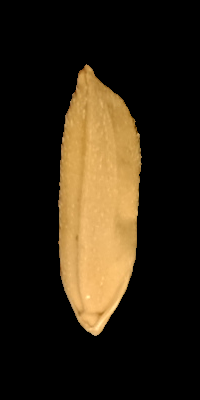

In [2]:
image_path = 'rice.png'
Image(image_path)

### 1.1 Sobel Edge Detection
Thư viện OpenCV cung cấp hàm cv2.Sobel() để tính đạo hàm Sobel của ảnh. 

Xem thêm các tham số của hàm: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#sobel

Để các thuật toán phát hiện biên edge detection làm việc tốt, trước hết ta cần làm mịn ảnh để loại bớt nhiễu. Ta có thể dùng hàm cv2.GaussianBlur() để làm mịn ảnh.

Hàm cv2.Sobel() cho phép tính đạo hàm theo các hướng dọc và ngang của ảnh, để tổng hợp kết quả, ta lấy trung bình của đạo hàm theo hai hướng tại mỗi điểm ảnh.

Cuối cùng, Sobel sẽ làm nổi bật các đường biên, còn các nhiễu sẽ mờ hơn, vì vậy ta chọn ngưỡng để loại bỏ các điểm ảnh có độ sáng thấp này.

In [3]:
def basic_sobel_edge_detection(image_path, blur_ksize=5, sobel_ksize=1, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=sobel_ksize)

    img_sobel = (img_sobelx + img_sobely)/2
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

Ta thử chạy hàm với một ảnh trong bộ dữ liệu và xem kết quả

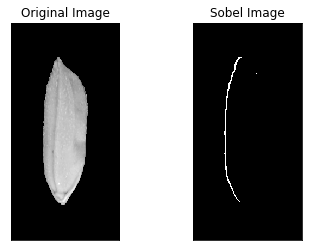

In [4]:
image_path = 'rice.png'
gray = cv2.imread(image_path, 0)
img_sobel = basic_sobel_edge_detection(image_path, 7, 1, 30)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

.

In [5]:
def sobel_edge_detection(image_path, blur_ksize=7, sobel_ksize=1, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    sobelx64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobelx64f)
    img_sobelx = np.uint8(abs_sobel64f)

    sobely64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobely64f)
    img_sobely = np.uint8(abs_sobel64f)

    img_sobel = (img_sobelx + img_sobely)/2
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

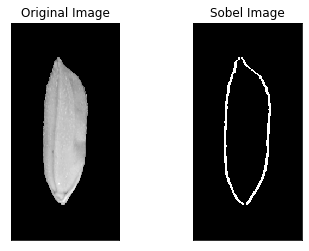

In [6]:
image_path = 'rice.png'
gray = cv2.imread(image_path, 0)
img_sobel = sobel_edge_detection(image_path, 7, 1, 30)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

Lưu kết quả Sobel Edge Detection ra thư mục

In [7]:
image_dir = './data/0'
save_dir = image_dir + '_sobel'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    img_sobel = sobel_edge_detection(image_path, 7, 1, 30)
    save_path = os.path.join(save_dir, file)
    cv2.imwrite(save_path, img_sobel)

### 1.2. Prewitt Edge Detection
Để tính đạo hàm theo toán tử Prewitt, ta có thể dùng hàm cv2.filter2D() và truyền tham số kernel theo Prewitt. 

Tương tự như với toán tử Sobel, ta sẽ tính 2 trường hợp cạnh black-to-white và white-to-black rồi tính trung bình cộng 2 kết quả. 

Cuối cùng đặt ngưỡng loại bỏ nhiễu.

In [8]:
def prewitt_edge_detection(image_path, blur_ksize = 5, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    #prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt1 = (img_prewittx + img_prewitty)/2
    
    kernelx2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    kernely2 = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    img_prewittx2 = cv2.filter2D(img_gaussian, -1, kernelx2)
    img_prewitty2 = cv2.filter2D(img_gaussian, -1, kernely2)
    img_prewitt2 = (img_prewittx2 + img_prewitty2)/2
    
    img_prewitt = (img_prewitt1 + img_prewitt2)/2
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] < skipping_threshold:
                img_prewitt[i][j] = 0
            else:
                img_prewitt[i][j] = 255
    return img_prewitt

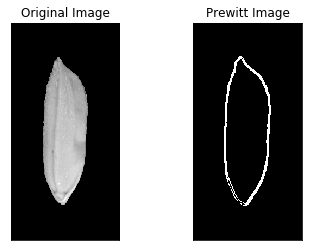

In [9]:
image_path = 'rice.png'
gray = cv2.imread(image_path, 0) 
img_prewitt = prewitt_edge_detection(image_path, 9, 30)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('Prewitt Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
image_dir = './data/0'
save_dir = image_dir + '_prewitt'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    img_prewitt = prewitt_edge_detection(image_path, 9, 30)
    save_path = os.path.join(save_dir, file)
    cv2.imwrite(save_path, img_prewitt)

### 1.3. Canny Edge Detection
Thư viện OpenCV cung cấp hàm cv2.Canny() để phát hiện biên bằng thuật toán Canny.

https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#cv2.Canny

Tương tự như các phương pháp phát hiện biên ở trên, trước hết ta cũng dùng cv2.GaussianBlur() để làm mịn ảnh rồi chọn ngưỡng để loại bỏ nhiễu.

In [11]:
def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
    return img_canny

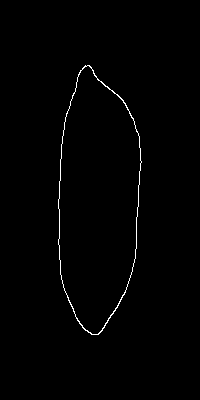

In [12]:
image_path = 'rice.png'
gray = cv2.imread(image_path, 0)
img_canny = canny_edge_detection(image_path, 15, 100, 200, 30)

cv2.imwrite('canny.png', img_canny)
Image('canny.png')

In [13]:
image_dir = './data/0'
save_dir = image_dir + '_canny'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    img_canny = canny_edge_detection(image_path, 17, 100, 200, 30)
    save_path = os.path.join(save_dir, file)
    cv2.imwrite(save_path, img_canny)

## Câu 3:
Đếm số pixel trên mỗi đường bao (chu vi) từ kết quả câu 2. Vẽ phân bố vể chu vi của mỗi
giống thóc (sử dụng dữ liệu của 30 ảnh). Nhận xét sự khác biệt giữa hai phân bố khi dùng kết
quả của hai phương pháp phát hiện biên tương ứng.

### Phân bố của Sobel edge detection

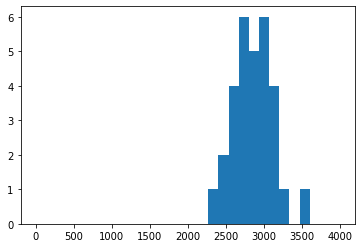

In [14]:
image_dir = './data/0'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 30
    img_sobel = sobel_edge_detection(image_path, skipping_threshold=skipping_threshold)
    chuvi = 0
    
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] >= skipping_threshold:
                chuvi += 1
    list_c.append(chuvi)
plt.hist(list_c, 30, [0, 4000]); plt.show()

### Phân bố của Prewitt edge detectimon

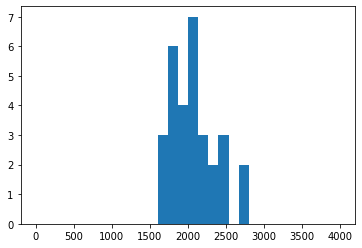

In [15]:
image_dir = './data/0'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 30
    img_prewitt = prewitt_edge_detection(image_path, skipping_threshold=skipping_threshold)
    chuvi = 0
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] >= skipping_threshold:
                chuvi += 1
    list_c.append(chuvi)
plt.hist(list_c, 30, [0, 4000]); plt.show()

### Phân bố của Canny edge detection

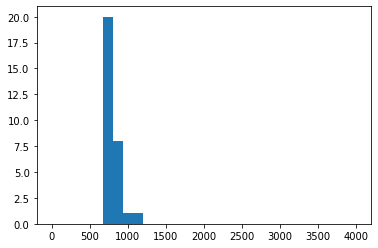

In [16]:
image_dir = './data/0'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 30
    img_canny = canny_edge_detection(image_path, skipping_threshold=skipping_threshold)

    chuvi = 0
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] >= skipping_threshold:
                chuvi += 1
    list_c.append(chuvi)
    
plt.hist(list_c, 30, [0, 4000]); plt.show()

## Câu 4:
Phát hiện làn đường: Dùng các phương pháp phát hiện biên ở trên để phát hiện làn đường trong các trường hợp sau

### 4.1: Làn đường thẳng

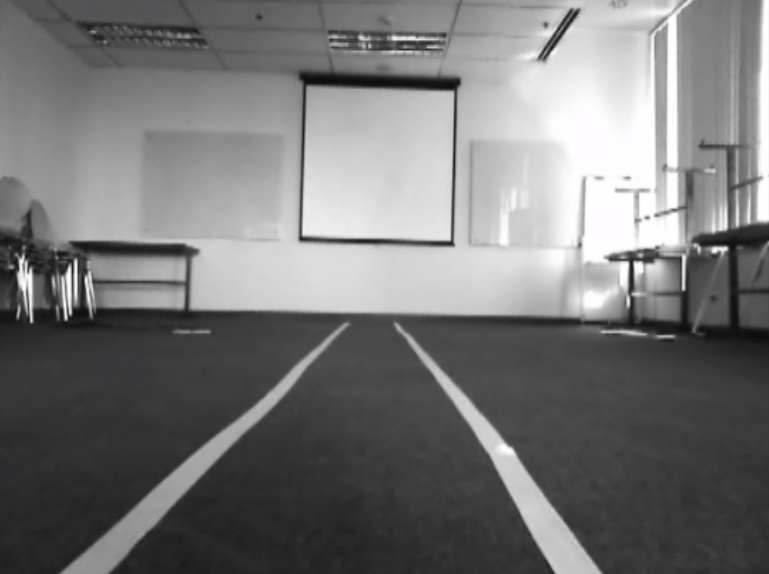

In [17]:
Image('./lane_detection/lane1.png')

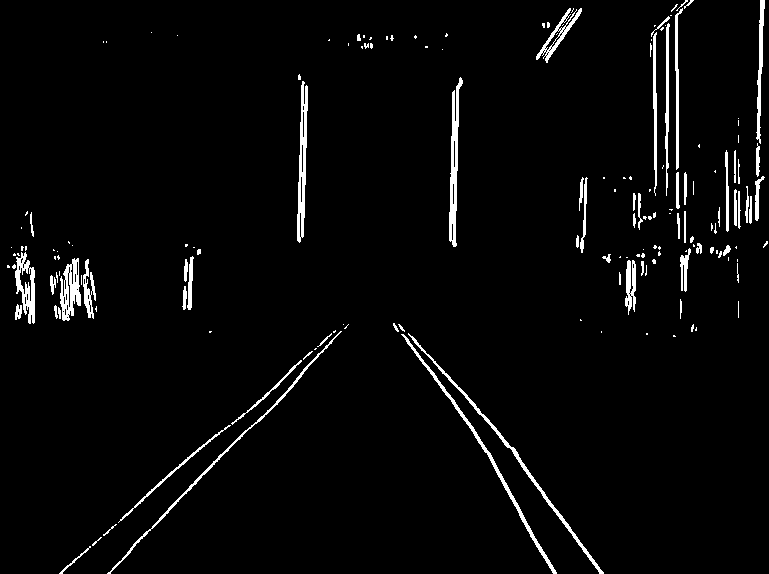

In [18]:
image_path = './lane_detection/lane1.png'

### YOUR CODE HERE ###
img_sobel = sobel_edge_detection(image_path, 3, 1, 30)
### YOUR CODE HERE ###

cv2.imwrite('lane1_sobel.png', img_sobel)
Image('lane1_sobel.png')

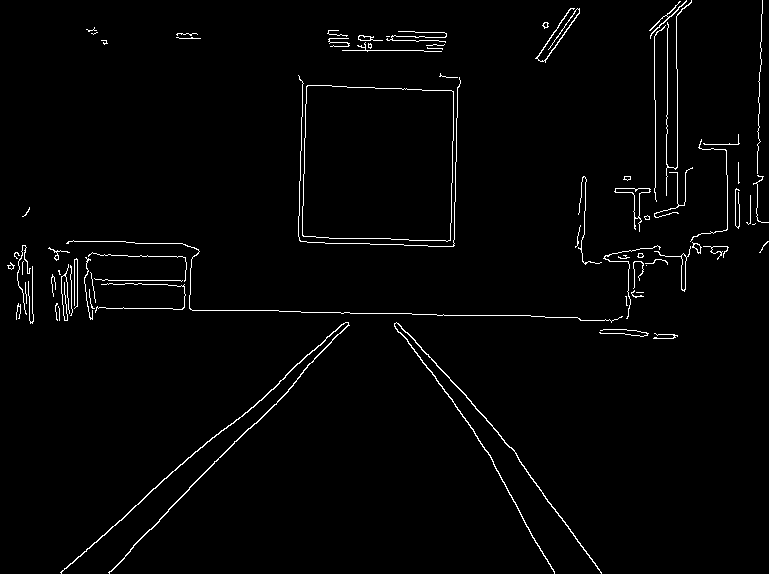

In [19]:
image_path = './lane_detection/lane1.png'

### YOUR CODE HERE ###
img_canny = canny_edge_detection('./lane_detection/lane1.png', 5, 100, 200, 30)
### YOUR CODE HERE ###

cv2.imwrite('lane1_canny.png', img_canny)
Image('lane1_canny.png')

Thư viện OpenCV cung cấp hàm cv2.HoughLinesP() để tìm ra các đoạn thẳng biên từ tập hợp các điểm biên (có được nhờ thuật toán Canny).

https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a

Parameters
- image: 8-bit, single-channel binary source image. The image may be modified by the function.
- rho: Distance resolution of the accumulator in pixels.
- theta: Angle resolution of the accumulator in radians.
- threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
- minLineLength: Minimum line length. Line segments shorter than that are rejected.
- maxLineGap: Maximum allowed gap between points on the same line to link them.

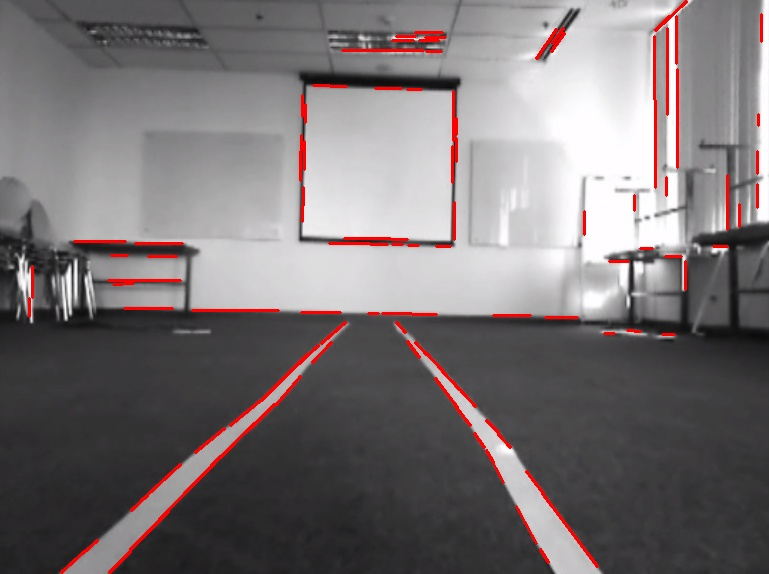

In [20]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)
edges = canny_edge_detection('./lane_detection/lane1.png', 5, 100, 200, 30)

minLineLength = 30
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines.jpg',img)
Image('houghlines.jpg')

### 4.2: Làn đường cong

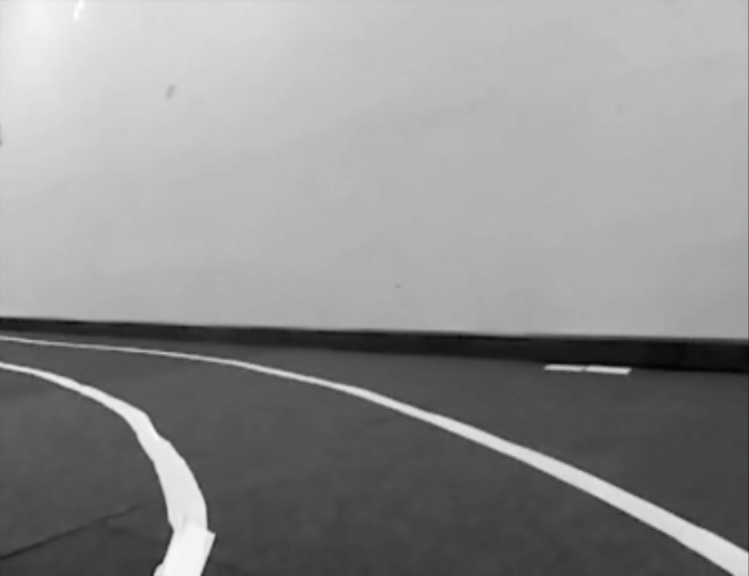

In [21]:
Image('./lane_detection/lane2.png')

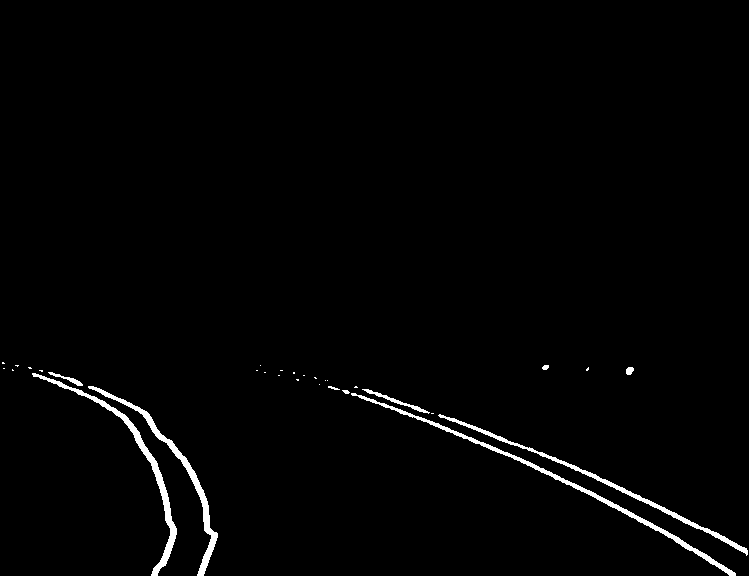

In [22]:
image_path = './lane_detection/lane2.png'
### YOUR CODE HERE ###
img_sobel = sobel_edge_detection(image_path, 7, 1, 15)
### YOUR CODE HERE ###

cv2.imwrite('lane2_sobel.png', img_sobel)
Image('lane2_sobel.png')

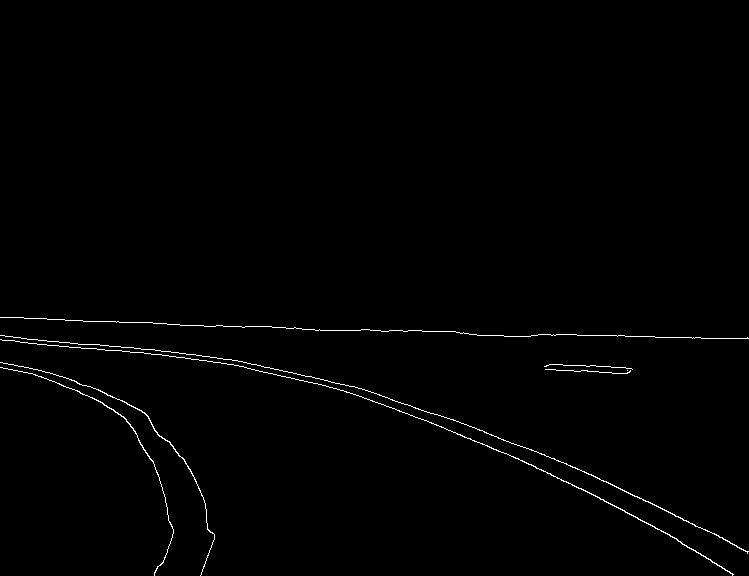

In [23]:
### YOUR CODE HERE ###
img_canny = canny_edge_detection('./lane_detection/lane2.png', 5, 70, 150, 30)
### YOUR CODE HERE ###

cv2.imwrite('lane2_canny.png', img_canny)
Image('lane2_canny.png')

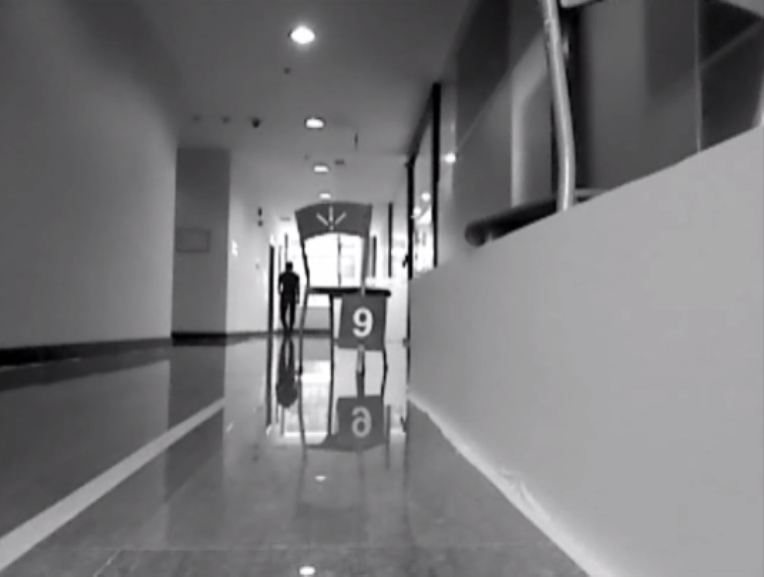

In [24]:
Image('./lane_detection/lane3.png')

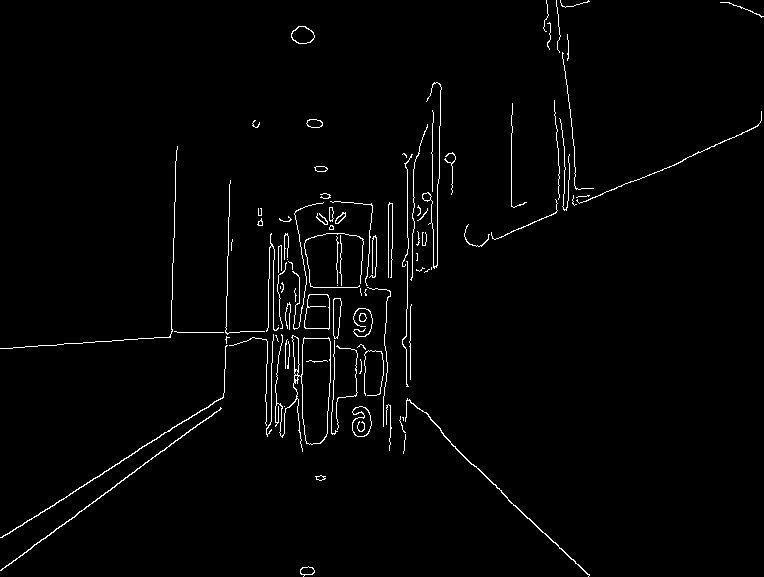

In [25]:
image_path = './lane_detection/lane2.png'
### YOUR CODE HERE ###
img_canny = canny_edge_detection('./lane_detection/lane3.png', 5, 70, 150, 30)
### YOUR CODE HERE ###

cv2.imwrite('lane3_canny.png', img_canny)
Image('lane3_canny.png')

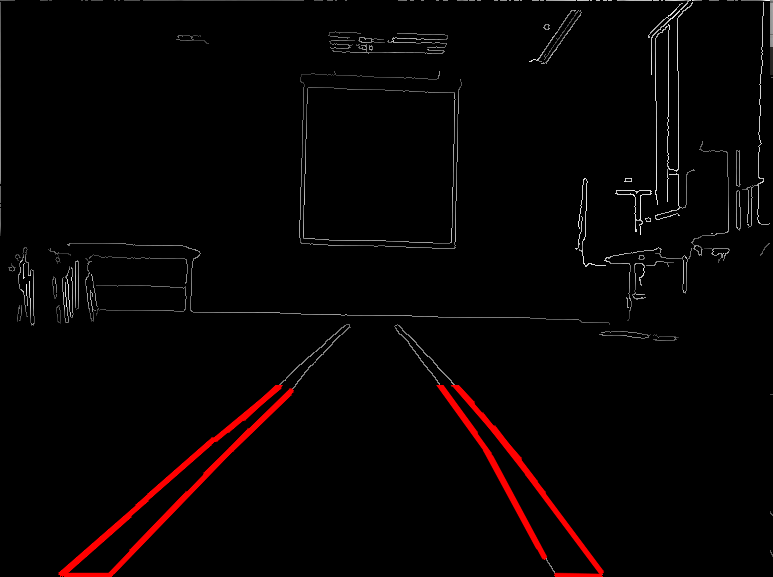

In [26]:
Image('./lane_detection/hough1.png')

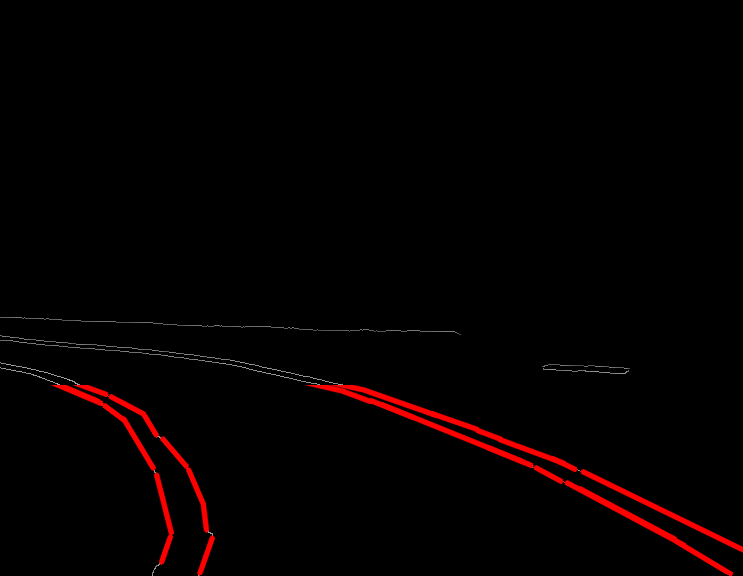

In [27]:
Image('./lane_detection/hough2.png')

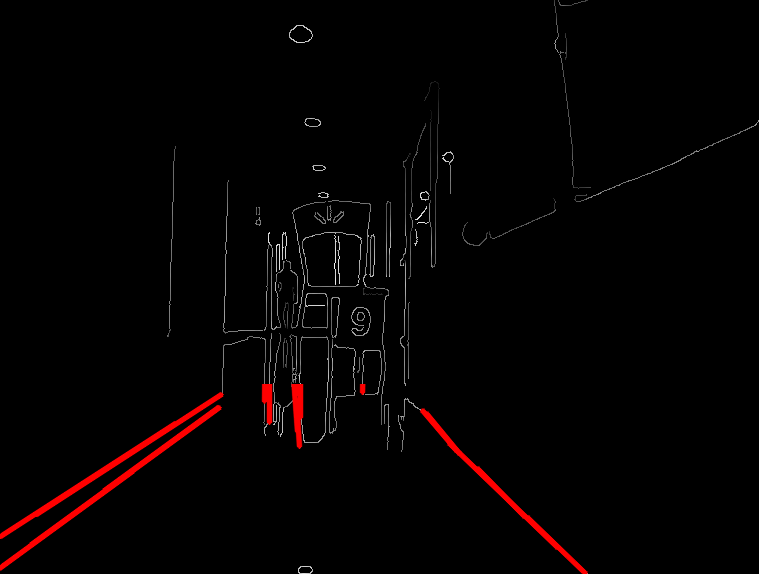

In [28]:
Image('./lane_detection/hough3.png')

# BÀI TẬP VỀ NHÀ

1. Phát hiện làn đường trong trường hợp làn đường bóng, có nhiễu do phản chiếu (lane_detection/lane3.png)
2. Phát hiện làn đường trong trường hợp làn đường bị nhiễu do chất lượng camera thấp (lane_detection/lane4.png)
3. Phát hiện làn đường trên một video

Link tải các video: https://husteduvn-my.sharepoint.com/:u:/g/personal/hieu_tt141567_sis_hust_edu_vn/EZPC362-gLdMg1ro66w1F3EBJM4ELw_edEYrHVm5FL2OeA?e=53wBMV

Gợi ý: Làm quen với việc xử lý video: 

Video là một tập hợp của nhiều frame ảnh liên tiếp. Để xử lý một video, ta phát hiện làn đường từng frame rồi ghép lại thành video.

Xem thêm: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html

Change to allow pre-load image into the function

In [29]:
def sobel_edge_detection(image_path, blur_ksize=7, sobel_ksize=1, skipping_threshold=30):
    if type(image_path) is str:
        img = cv2.imread(image_path)
    else:
        img = image_path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    sobelx64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobelx64f)
    img_sobelx = np.uint8(abs_sobel64f)

    sobely64f = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    abs_sobel64f = np.absolute(sobely64f)
    img_sobely = np.uint8(abs_sobel64f)

    img_sobel = (img_sobelx + img_sobely)/2
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    if type(image_path) is str:
        img = cv2.imread(image_path)
    else:
        img = image_path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
    return img_canny

In [71]:
cap = cv2.VideoCapture('./video_lane/lane1.avi')
size = cap.read()[1].shape[1::-1]
cap.release()
cap = cv2.VideoCapture('./video_lane/lane1.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('./video_lane/output1.avi',fourcc, 25.0, size)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if frame is None:
        break
    ### LANE DETECTION HERE ###
    ### YOUR CODE HERE ###
    frame_sobel = sobel_edge_detection(frame, 7, 1, 15)
    ### YOUR CODE HERE ###

    cv2.imshow('frame',frame_sobel)
    frame_sobel = frame_sobel.astype(np.uint8)
    out.write(frame_sobel)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0


In [72]:
cap = cv2.VideoCapture('./video_lane/lane2.avi')
size = cap.read()[1].shape[1::-1]
cap.release()
cap = cv2.VideoCapture('./video_lane/lane2.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('./video_lane/output2.avi',fourcc, 25.0, size)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if frame is None:
        break
    ### LANE DETECTION HERE ###
    ### YOUR CODE HERE ###
    frame_canny = canny_edge_detection(frame, 5, 70, 150, 30)
    ### YOUR CODE HERE ###

    cv2.imshow('frame',frame_canny)
    frame_canny = frame_canny.astype(np.uint8)
    out.write(frame_canny)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [73]:
cap = cv2.VideoCapture('./video_lane/lane3.avi')
size = cap.read()[1].shape[1::-1]
cap.release()
cap = cv2.VideoCapture('./video_lane/lane3.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('./video_lane/output3.avi',fourcc, 25.0, size)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if frame is None:
        break
    ### LANE DETECTION HERE ###
    ### YOUR CODE HERE ###
    frame_sobel = sobel_edge_detection(frame, 7, 1, 15)
    ### YOUR CODE HERE ###

    cv2.imshow('frame',frame_sobel)
    frame_sobel = frame_sobel.astype(np.uint8)
    out.write(frame_sobel)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('./video_lane/lane4.avi')
size = cap.read()[1].shape[1::-1]
cap.release()
cap = cv2.VideoCapture('./video_lane/lane4.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('./video_lane/output4.avi',fourcc, 25.0, size)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if frame is None:
        break
    ### LANE DETECTION HERE ###
    ### YOUR CODE HERE ###
    frame_canny = canny_edge_detection(frame, 5, 70, 150, 30)
    ### YOUR CODE HERE ###

    cv2.imshow('frame',frame_canny)
    frame_canny = frame_canny.astype(np.uint8)
    out.write(frame_canny)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
out.release()
cv2.destroyAllWindows()